<a href="https://colab.research.google.com/github/Zfeng0207/FIT3199-FYP/blob/dev%2Fzfeng/00_data_labeling_and_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Labeling and Sampling

## Data Ingestion

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [93]:
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
datetimeevents = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/datetimeevents.csv')
diagnosis = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/diagnosis.csv')
vitalsign = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/vitalsign.csv')
patient_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/patients.csv')

### Dataset Shapes

In [95]:
print(f'datetimeevents shape: {datetimeevents.shape}')
print(f'diagnosis shape: {diagnosis.shape}')
print(f'vitalsign shape: {vitalsign.shape}')
print(f'patient_info shape: {patient_info.shape}')

datetimeevents shape: (7112999, 10)
diagnosis shape: (899050, 6)
vitalsign shape: (1564610, 11)
patient_info shape: (299712, 6)


### Data Overview

#### vitalsign

In [96]:
vitalsign.head(5)

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
0,10000032,32952584,2180-07-22 16:36:00,NaN,83.0,24.0,97.0,90.0,51.0,NaN,0
1,10000032,32952584,2180-07-22 16:43:00,NaN,85.0,22.0,98.0,76.0,39.0,NaN,0
2,10000032,32952584,2180-07-22 16:45:00,NaN,84.0,22.0,97.0,75.0,39.0,NaN,0
3,10000032,32952584,2180-07-22 17:56:00,NaN,84.0,20.0,99.0,86.0,51.0,NaN,NaN
4,10000032,32952584,2180-07-22 18:37:00,98.4,86.0,20.0,98.0,65.0,37.0,NaN,NaN


In [97]:
print(vitalsign.dtypes)

subject_id       int64
stay_id          int64
charttime       object
temperature    float64
heartrate      float64
resprate       float64
o2sat          float64
sbp            float64
dbp            float64
rhythm          object
pain            object
dtype: object


#### diagnosis

In [98]:
diagnosis.head(5)

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES


In [99]:
print(diagnosis.dtypes)

subject_id      int64
stay_id         int64
seq_num         int64
icd_code       object
icd_version     int64
icd_title      object
dtype: object


There are a total of 13199 unique icd codes

In [100]:
diagnosis['icd_code'].nunique()

13199

In [101]:
# unique_diagnosis.to_csv('unique_diagnosis.csv', index = False)

#### datetimeevents

In [102]:
datetimeevents.head(5)

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valueuom,warning
0,10000032,29079034,39553978,66056,2180-07-23 21:02:00,2180-07-23 21:02:00,225754,2180-07-23 00:00:00,Date,0
1,10000032,29079034,39553978,66056,2180-07-23 21:02:00,2180-07-23 21:02:00,225755,2180-07-23 00:00:00,Date,0
2,10000032,29079034,39553978,88981,2180-07-23 14:24:00,2180-07-23 14:24:00,225754,2180-07-23 14:24:00,Date,0
3,10000032,29079034,39553978,88981,2180-07-23 14:24:00,2180-07-23 14:24:00,225755,2180-07-23 14:24:00,Date,0
4,10000980,26913865,39765666,36518,2189-06-27 09:13:00,2189-06-27 09:13:00,225755,2189-06-27 09:13:00,Date,0


In [103]:
print(datetimeevents.dtypes)

subject_id       int64
hadm_id          int64
stay_id          int64
caregiver_id     int64
charttime       object
storetime       object
itemid           int64
value           object
valueuom        object
warning          int64
dtype: object


#### patient_info

In [104]:
patient_info.head(5)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN


In [105]:
print(patient_info.dtypes)

subject_id            int64
gender               object
anchor_age            int64
anchor_year           int64
anchor_year_group    object
dod                  object
dtype: object


##### Insights
**Observations**


**Key Takeaway**


## Data Labeling

Labelling target class based on the given journal:
*italicized text*
https://www.ahajournals.org/doi/10.1161/01.str.0000174293.17959.a1

- explains stroke related icd codes
- rule based risk factor
- ICD-9 Code 362 & ICD-10 Code G45 is not entirely stroke, will ignore these for now

| Stroke Type | ICD-9 Code | Definition | ICD-10 Code | Definition |
|------------|------------|-----------------------------|------------|------------------------------------------------|
| **AIS**    | 362.3      | Retinal vascular occlusion | H34.1      | Central retina artery occlusion |
|            | 433.x1     | Occlusion and stenosis of precerebral arteries | I63.x | Cerebral infarction |
|            | 434.x1     | Occlusion of cerebral arteries | I64.x | Stroke, not specified as hemorrhage or infarction |
|            | 436        | Acute, but ill-defined cerebrovascular disease |  |  |
| **ICH**    | 431.x      | Intracerebral hemorrhage | I61.x | Intracerebral hemorrhage |
| **SAH**    | 430.x      | Subarachnoid hemorrhage | I60.x | Subarachnoid hemorrhage |
| **TIA**    | 435.x      | Transient cerebral ischemia | G45.x | Transient cerebral ischemic attacks and related syndromes |


### Stroke Patients: Mapping Stroke Diseases

In [107]:
diagnosis

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES
...,...,...,...,...,...,...
899045,19999828,30712109,1,K632,10,Fistula of intestine
899046,19999828,32917002,1,E1110,10,Type 2 diabetes mellitus with ketoacidosis wit...
899047,19999828,32917002,2,Z7984,10,Long term (current) use of oral hypoglycemic d...
899048,19999914,32002659,1,R4182,10,"Altered mental status, unspecified"


In [284]:
diagnosis

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES
...,...,...,...,...,...,...
899045,19999828,30712109,1,K632,10,Fistula of intestine
899046,19999828,32917002,1,E1110,10,Type 2 diabetes mellitus with ketoacidosis wit...
899047,19999828,32917002,2,Z7984,10,Long term (current) use of oral hypoglycemic d...
899048,19999914,32002659,1,R4182,10,"Altered mental status, unspecified"


In [181]:
diagnosis_df.dtypes

,0
subject_id,int64
stay_id,int64
seq_num,int64
icd_code,object
icd_version,int64
icd_title,object
numeric_part,int64
Stroke_Y/N,int64


In [230]:
diagnosis_df[diagnosis_df['icd_version'] == 9]

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N
0,10000032,32952584,1,4589,9,HYPOTENSION NOS,4589,0
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...,7070,0
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION,8,0
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS",5728,0
4,10000032,33258284,2,78959,9,OTHER ASCITES,78959,0
...,...,...,...,...,...,...,...,...
899031,19999733,30940569,1,9957,9,"OTHER ADVERSE FOOD REACTIONS, NOT ELSEWHERE CL...",9957,0
899032,19999733,30940569,2,7820,9,SKIN SENSATION DISTURB,7820,0
899033,19999733,30940569,3,E9289,9,ACCIDENT NOS,9289,0
899034,19999733,30940569,4,34590,9,"EPILEPSY, NOS WITHOUT INTRACTABLE EPILEPSY",34590,0


#### Labeling Stroke

In [306]:
import numpy as np
import pandas as pd
import re

def extract_numeric_part(icd_code):
    """
    Extracts the numeric portion of an ICD code by removing non-numeric characters.
    - Includes leading zeros.
    - Returns np.nan if the conversion fails.
    """
    numeric_part = ''.join(filter(str.isdigit, icd_code))
    try:
        return numeric_part
    except ValueError:
        return np.nan

# Define icd code numeric ranges
icd10_valid_ranges = [str(i) for i in range(60, 65)]
icd9_valid_ranges = [str(i) for i in range(430, 437)]

diagnosis_df = diagnosis.copy()

# extract numeric part of the icd code
diagnosis_df['numeric_part'] = diagnosis_df['icd_code'].apply(extract_numeric_part)



condition = (
    # ICD-10 codes
    (diagnosis_df['icd_code'].str.startswith('I')) &
    (diagnosis_df['icd_version'] == 10) &
    (diagnosis_df['numeric_part'].str[:2].isin(icd10_valid_ranges))

    |

    # ICD 9 codes
    ((diagnosis_df['icd_code'].str.startswith('H')) & (diagnosis_df['numeric_part'].str[:2] == '34')) |
    # ((diagnosis_df['icd_code'].str.startswith('G')) & (diagnosis_df['numeric_part'].str[:2] == '45')) |
    diagnosis_df['icd_code'].str.isnumeric() &  # Ensure numeric ICD codes
    (diagnosis_df['icd_version'] == 9) &  # Check if it's ICD-9
    (diagnosis_df['numeric_part'].isin(map(str,icd9_valid_ranges))
    # | (diagnosis_df['numeric_part'].str[:3] == '362')
    )
)

# commented out those two codes for now as may not be stroke

# Initialize Stroke_Y/N column with 0
diagnosis_df['Stroke_Y/N'] = 0
diagnosis_df.loc[condition, 'Stroke_Y/N'] = 1

# Display result
diagnosis_df


,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N
0,10000032,32952584,1,4589,9,HYPOTENSION NOS,4589,0
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...,07070,0
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION,08,0
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS",5728,0
4,10000032,33258284,2,78959,9,OTHER ASCITES,78959,0
...,...,...,...,...,...,...,...,...
899045,19999828,30712109,1,K632,10,Fistula of intestine,632,0
899046,19999828,32917002,1,E1110,10,Type 2 diabetes mellitus with ketoacidosis wit...,1110,0
899047,19999828,32917002,2,Z7984,10,Long term (current) use of oral hypoglycemic d...,7984,0
899048,19999914,32002659,1,R4182,10,"Altered mental status, unspecified",4182,0


Number of stroke diagnosis is 0.0014%

In [307]:
for icd_title, group in stroke_df.groupby('icd_title'):
    unique_icd_codes = group['icd_code'].unique()
    print(f"ICD Title: {icd_title}")
    print(f"ICD Codes: {unique_icd_codes}")
    print("-" * 20)  # Separator for better readability

ICD Title: Central retinal artery occlusion, left eye
ICD Codes: ['H3412']
--------------------
ICD Title: Central retinal artery occlusion, right eye
ICD Codes: ['H3411']
--------------------
ICD Title: Cereb infrc d/t unsp occls or stenos of left mid cereb art
ICD Codes: ['I63512']
--------------------
ICD Title: Cereb infrc d/t unsp occls or stenos of right mid cereb art
ICD Codes: ['I63511']
--------------------
ICD Title: Cereb infrc d/t unsp occls or stenos of right post cereb art
ICD Codes: ['I63531']
--------------------
ICD Title: Cereb infrc due to unsp occls or stenos of left carotid art
ICD Codes: ['I63232']
--------------------
ICD Title: Cereb infrc due to unsp occls or stenos of right carotid art
ICD Codes: ['I63231']
--------------------
ICD Title: Cereb infrc due to unsp occls or stenos of unsp precerb art
ICD Codes: ['I6320']
--------------------
ICD Title: Cereb infrc due to unsp occls or stenosis of basilar artery
ICD Codes: ['I6322']
--------------------
ICD Title:

#### Stroke Patients Sample

In [315]:
stroke_df = diagnosis_df[diagnosis_df['Stroke_Y/N'] == 1]

Stroke_Y/N
0    895622
1      3428
Name: count, dtype: int64


<ipython-input-308-9090511ee4d9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=icd_counts.index, y=icd_counts.values, palette='viridis')


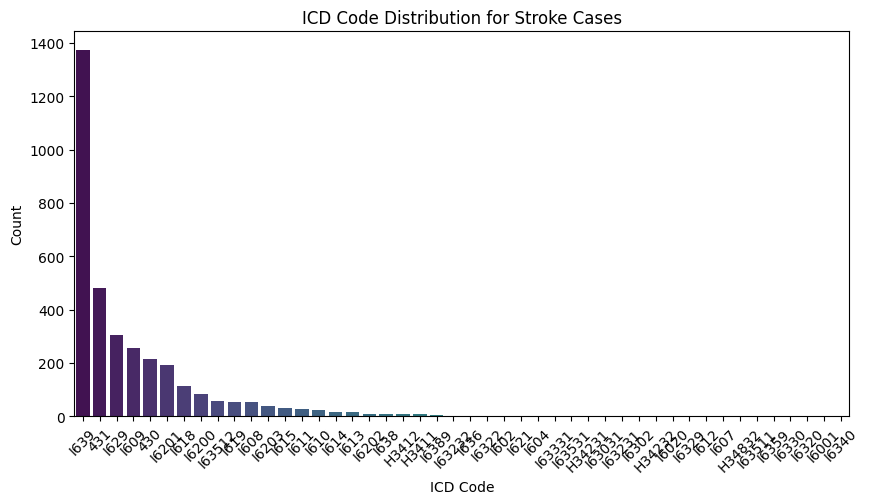

In [308]:
targets = diagnosis_df['Stroke_Y/N']

temp = targets.value_counts()
print(temp)

# Count unique ICD code occurrences
icd_counts = stroke_df['icd_code'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=icd_counts.index, y=icd_counts.values, palette='viridis')

# Add labels
plt.xlabel("ICD Code")
plt.ylabel("Count")
plt.title("ICD Code Distribution for Stroke Cases")
plt.xticks(rotation=45)  # Rotate labels for readability

# Show plot
plt.show()

In [319]:
stroke_df.shape

(3428, 8)

In [311]:
stroke_df['subject_id'].nunique()

3245

there are a few duplicate patients

In [375]:
filtered_df.groupby('subject_id').count().sort_values(by='Stroke_Y/N', ascending=False)

,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain,...,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N,gender,anchor_age,anchor_year,anchor_year_group,dod
subject_id,,,,,,,,,,,,,,,,,,,,,
19127408,696,695,362,666,676,644,645,645,54,477,...,696,696,696,696,696,696,696,696,696,0
18065731,618,618,392,599,591,575,590,590,12,379,...,618,618,618,618,618,618,618,618,618,0
16273050,522,522,301,440,474,438,445,445,2,351,...,522,522,522,522,522,522,522,522,522,0
11242742,484,484,222,478,467,453,469,469,55,400,...,484,484,484,484,484,484,484,484,484,484
17729814,455,453,301,415,420,413,415,415,0,302,...,455,455,455,455,455,455,455,455,455,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17123455,3,3,3,3,3,1,3,3,0,3,...,3,3,3,3,3,3,3,3,3,3
14211509,3,3,0,0,0,0,0,0,0,3,...,3,3,3,3,3,3,3,3,3,3
13794277,3,2,0,2,2,2,2,2,0,2,...,3,3,3,3,3,3,3,3,3,3


In [373]:
import pandas as pd

# Step 1: Count unique stay_id per subject_id
stay_counts = merged_pi_df.groupby('subject_id')['stay_id'].nunique()

# Step 2: Filter to keep only subject_ids with more than one stay_id
valid_subjects = stay_counts[stay_counts > 1].index

# Step 3: Filter the original DataFrame
filtered_df = merged_pi_df[merged_pi_df['subject_id'].isin(valid_subjects)]

# Display result
print(filtered_df)


       subject_id   stay_id            charttime  temperature  heartrate  \
14       10003299  31931401  2183-02-26 20:26:00         97.7       63.0   
15       10003299  31931401  2183-02-26 21:43:00          NaN       51.0   
16       10003299  31931401  2183-02-26 22:03:00          NaN       57.0   
17       10003299  31931401  2183-02-27 02:20:00          NaN       54.0   
18       10003299  31931401  2183-02-27 06:26:00         98.7       61.0   
...           ...       ...                  ...          ...        ...   
86136    19992885  35746474  2152-07-07 18:02:00          NaN        NaN   
86137    19992885  35746474  2152-07-07 19:48:00         98.3       73.0   
86138    19992885  35746474  2152-07-07 22:55:00         98.4       78.0   
86139    19992885  35746474  2152-07-08 01:28:00         98.0       74.0   
86140    19992885  35746474  2152-07-08 03:34:00         97.8       78.0   

       resprate  o2sat    sbp   dbp rhythm  ... icd_code  icd_version  \
14         15.

In [374]:
filtered_df

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,...,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N,gender,anchor_age,anchor_year,anchor_year_group,dod
14,10003299,31931401,2183-02-26 20:26:00,97.7,63.0,15.0,97.0,146.0,65.0,NaN,...,R918,10,Other nonspecific abnormal finding of lung field,918,0,F,65,2173,2008 - 2010,2183-08-12
15,10003299,31931401,2183-02-26 21:43:00,NaN,51.0,16.0,97.0,131.0,42.0,NaN,...,R918,10,Other nonspecific abnormal finding of lung field,918,0,F,65,2173,2008 - 2010,2183-08-12
16,10003299,31931401,2183-02-26 22:03:00,NaN,57.0,19.0,100.0,142.0,54.0,NaN,...,R918,10,Other nonspecific abnormal finding of lung field,918,0,F,65,2173,2008 - 2010,2183-08-12
17,10003299,31931401,2183-02-27 02:20:00,NaN,54.0,18.0,97.0,129.0,56.0,NaN,...,R918,10,Other nonspecific abnormal finding of lung field,918,0,F,65,2173,2008 - 2010,2183-08-12
18,10003299,31931401,2183-02-27 06:26:00,98.7,61.0,15.0,98.0,123.0,53.0,NaN,...,R918,10,Other nonspecific abnormal finding of lung field,918,0,F,65,2173,2008 - 2010,2183-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86136,19992885,35746474,2152-07-07 18:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,E8788,9,ABN REACT-SURG PROC NEC,8788,0,M,50,2152,2014 - 2016,2152-07-24
86137,19992885,35746474,2152-07-07 19:48:00,98.3,73.0,18.0,97.0,124.0,71.0,NaN,...,E8788,9,ABN REACT-SURG PROC NEC,8788,0,M,50,2152,2014 - 2016,2152-07-24
86138,19992885,35746474,2152-07-07 22:55:00,98.4,78.0,18.0,96.0,114.0,65.0,NaN,...,E8788,9,ABN REACT-SURG PROC NEC,8788,0,M,50,2152,2014 - 2016,2152-07-24
86139,19992885,35746474,2152-07-08 01:28:00,98.0,74.0,18.0,99.0,118.0,55.0,NaN,...,E8788,9,ABN REACT-SURG PROC NEC,8788,0,M,50,2152,2014 - 2016,2152-07-24


#### Patients with at least one occurence of stroke

In [316]:
# Get unique subject IDs with at least one stroke occurrence
stroke_subject_ids = diagnosis_df[diagnosis_df['Stroke_Y/N'] == 1]['subject_id'].unique()

# Create the new DataFrame
has_stroke_occurence_df = diagnosis_df[diagnosis_df['subject_id'].isin(stroke_subject_ids)]

In [323]:
has_stroke_occurence_df

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N
152,10001667,33673933,1,I639,10,"Cerebral infarction, unspecified",639,1
406,10003299,31931401,1,R918,10,Other nonspecific abnormal finding of lung field,918,0
407,10003299,32908139,1,R531,10,Weakness,531,0
408,10003299,32908139,2,I639,10,"Cerebral infarction, unspecified",639,1
409,10003299,32967983,1,J029,10,"Acute pharyngitis, unspecified",029,0
...,...,...,...,...,...,...,...,...
898477,19992885,34321224,1,431,9,INTRACEREBRAL HEMORRHAGE,431,1
898478,19992885,35746474,1,9972,9,SURG COMP-PERI VASC SYST,9972,0
898479,19992885,35746474,2,4423,9,LOWER EXTREMITY ANEURYSM,4423,0
898480,19992885,35746474,3,E8788,9,ABN REACT-SURG PROC NEC,8788,0


#### Recurrent Stroke Events

In [313]:
recurrent_stroke_df = stroke_df.groupby('subject_id').filter(lambda x: x['Stroke_Y/N'].count() >= 1)
recurrent_stroke_df = recurrent_stroke_df.reset_index(drop=True)  # Optional: Reset index

In [314]:
recurrent_stroke_df

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N
0,10083814,30638983,2,I6201,10,Nontraumatic acute subdural hemorrhage,6201,1
1,10083814,34455644,1,I6201,10,Nontraumatic acute subdural hemorrhage,6201,1
2,10148993,31700248,1,I6201,10,Nontraumatic acute subdural hemorrhage,6201,1
3,10148993,31700248,2,I6203,10,Nontraumatic chronic subdural hemorrhage,6203,1
4,10250007,38533761,1,I609,10,"Nontraumatic subarachnoid hemorrhage, unspecified",609,1
...,...,...,...,...,...,...,...,...
340,19726617,39633953,1,I639,10,"Cerebral infarction, unspecified",639,1
341,19788295,34388551,1,431,9,INTRACEREBRAL HEMORRHAGE,431,1
342,19788295,35539255,2,431,9,INTRACEREBRAL HEMORRHAGE,431,1
343,19949052,31801346,1,430,9,SUBARACHNOID HEMORRHAGE,430,1


In [347]:
# Get unique stay_id count for each subject_id
stay_counts = merged_vs_df.groupby('subject_id')['stay_id'].nunique()

# Optional: Convert to DataFrame
stay_counts_df = stay_counts.reset_index()

# Print the result
print(stay_counts_df.sort_values(by='stay_id', ascending=False))

      subject_id  stay_id
2955    19127408       60
2402    17438385       50
1988    16177747       49
1250    13931815       42
2603    18065731       40
...          ...      ...
1350    14254928        1
1353    14269476        1
1356    14274615        1
1357    14277195        1
3244    19999987        1

[3245 rows x 2 columns]


In [351]:
merged_vs_df.dtypes

,0
subject_id,int64
stay_id,int64
charttime,object
temperature,float64
heartrate,float64
resprate,float64
o2sat,float64
sbp,float64
dbp,float64
rhythm,object


In [5]:
merged_pi_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/00_recurrent_stroke_patient.csv")

In [6]:
subject_df = merged_pi_df[merged_pi_df['subject_id']==19127408]

In [11]:
import pandas as pd

# Convert `charttime` to datetime format
subject_df['charttime'] = pd.to_datetime(subject_df['charttime'])

# Create a new column for the date (without time)
subject_df['date'] = subject_df['charttime'].dt.date

# Aggregate per patient and per day
aggregated_df = subject_df.groupby(['stay_id', 'date']).agg({
    'temperature': ['mean', 'min', 'max', 'std'],
    'heartrate': ['mean', 'min', 'max', 'std'],
    'resprate': ['mean', 'min', 'max', 'std'],
    'o2sat': ['mean', 'min', 'max', 'std'],
    'sbp': ['mean', 'min', 'max', 'std'],
    'dbp': ['mean', 'min', 'max', 'std']
}).reset_index()

# Rename columns
aggregated_df.columns = ['_'.join(col).strip() for col in aggregated_df.columns.values]


<ipython-input-11-0c8d8d24c5da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_df['charttime'] = pd.to_datetime(subject_df['charttime'])
<ipython-input-11-0c8d8d24c5da>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_df['date'] = subject_df['charttime'].dt.date


In [12]:
aggregated_df

,stay_id_,date_,temperature_mean,temperature_min,temperature_max,temperature_std,heartrate_mean,heartrate_min,heartrate_max,heartrate_std,...,o2sat_max,o2sat_std,sbp_mean,sbp_min,sbp_max,sbp_std,dbp_mean,dbp_min,dbp_max,dbp_std
0,30004300,2152-02-09,97.35,97.3,97.4,0.070711,59.000000,57.0,61.0,2.828427,...,100.0,0.000000,142.500000,136.0,149.0,9.192388,71.000000,69.0,73.0,2.828427
1,30004300,2152-02-10,97.85,97.8,97.9,0.070711,57.750000,54.0,63.0,3.774917,...,100.0,2.061553,117.000000,97.0,138.0,16.792856,49.250000,34.0,67.0,14.407753
2,30166821,2152-11-17,98.40,98.4,98.4,0.000000,98.000000,98.0,98.0,0.000000,...,100.0,0.000000,134.000000,134.0,134.0,0.000000,64.000000,64.0,64.0,0.000000
3,30166821,2152-11-18,98.25,98.1,98.4,0.160357,83.000000,65.0,98.0,11.130396,...,100.0,2.427357,110.125000,95.0,128.0,10.490395,56.000000,23.0,71.0,15.163624
4,30192725,2148-11-08,98.70,98.7,98.7,NaN,80.000000,80.0,80.0,NaN,...,98.0,NaN,113.000000,113.0,113.0,NaN,74.000000,74.0,74.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,39562222,2148-03-16,98.15,98.0,98.3,0.164317,60.000000,60.0,60.0,0.000000,...,95.0,0.000000,111.500000,110.0,113.0,1.643168,56.500000,50.0,63.0,7.120393
73,39638554,2152-10-29,98.10,98.1,98.1,NaN,80.000000,63.0,97.0,24.041631,...,100.0,0.000000,123.000000,123.0,123.0,NaN,42.000000,42.0,42.0,NaN
74,39638554,2152-10-30,99.80,99.8,99.8,NaN,88.333333,62.0,108.0,23.713569,...,100.0,2.081666,115.000000,106.0,123.0,8.544004,65.333333,60.0,73.0,6.806859
75,39663001,2149-10-02,97.50,97.1,97.7,0.346410,60.000000,59.0,61.0,1.000000,...,98.0,1.000000,129.333333,120.0,138.0,9.018500,82.333333,81.0,85.0,2.309401


<ipython-input-9-64588be343f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_df['charttime'] = pd.to_datetime(subject_df['charttime'])  # Ensure charttime is in datetime format


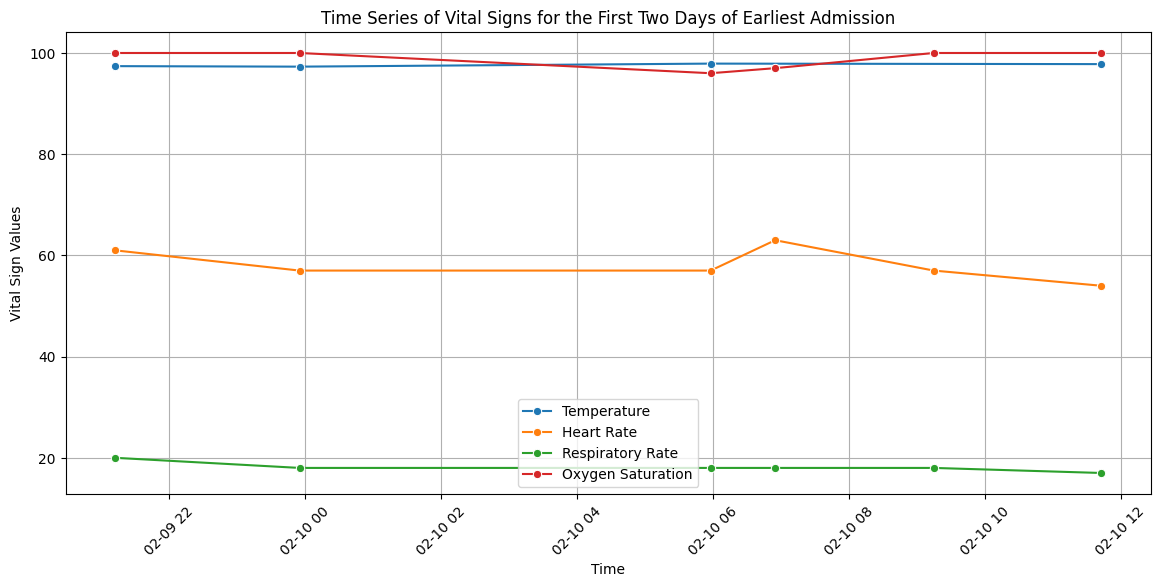

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming subject_df is already loaded and contains the vital sign data
subject_df['charttime'] = pd.to_datetime(subject_df['charttime'])  # Ensure charttime is in datetime format

# 1. Find the earliest stay_id
earliest_stay_id = subject_df['stay_id'].min()

# 2. Filter data for the earliest stay_id
filtered_df = subject_df[subject_df['stay_id'] == earliest_stay_id]

# 3. Filter data for the first two days
filtered_df = filtered_df[filtered_df['charttime'] <= filtered_df['charttime'].min() + pd.Timedelta(days=2)]

# Set figure size
plt.figure(figsize=(14, 6))

# Plot each vital sign over time
sns.lineplot(data=filtered_df, x='charttime', y='temperature', label='Temperature', marker='o')
sns.lineplot(data=filtered_df, x='charttime', y='heartrate', label='Heart Rate', marker='o')
sns.lineplot(data=filtered_df, x='charttime', y='resprate', label='Respiratory Rate', marker='o')
sns.lineplot(data=filtered_df, x='charttime', y='o2sat', label='Oxygen Saturation', marker='o')

# Formatting
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel("Vital Sign Values")
plt.title("Time Series of Vital Signs for the First Two Days of Earliest Admission")
plt.legend()
plt.grid()

plt.show()

In [361]:
subject_df

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,...,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N,gender,anchor_age,anchor_year,anchor_year_group,dod
77215,19127408,30004300,2152-02-09 21:12:00,97.4,61.0,20.0,100.0,149.0,73.0,NaN,...,B349,10,"Viral infection, unspecified",349,0,F,48,2143,2008 - 2010,NaN
77216,19127408,30004300,2152-02-09 23:55:00,97.3,57.0,18.0,100.0,136.0,69.0,NaN,...,B349,10,"Viral infection, unspecified",349,0,F,48,2143,2008 - 2010,NaN
77217,19127408,30004300,2152-02-10 05:58:00,97.9,57.0,18.0,96.0,97.0,34.0,NaN,...,B349,10,"Viral infection, unspecified",349,0,F,48,2143,2008 - 2010,NaN
77218,19127408,30004300,2152-02-10 06:55:00,NaN,63.0,18.0,97.0,118.0,42.0,NaN,...,B349,10,"Viral infection, unspecified",349,0,F,48,2143,2008 - 2010,NaN
77219,19127408,30004300,2152-02-10 09:15:00,NaN,57.0,18.0,100.0,138.0,67.0,NaN,...,B349,10,"Viral infection, unspecified",349,0,F,48,2143,2008 - 2010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77906,19127408,39663001,2149-10-02 11:38:00,97.1,60.0,16.0,97.0,130.0,85.0,NaN,...,61171,9,MASTODYNIA,61171,0,F,48,2143,2008 - 2010,NaN
77907,19127408,39663001,2149-10-02 13:19:00,97.7,61.0,18.0,98.0,120.0,81.0,NaN,...,61171,9,MASTODYNIA,61171,0,F,48,2143,2008 - 2010,NaN
77908,19127408,39943161,2147-05-09 00:25:00,98.0,67.0,15.0,99.0,156.0,78.0,NaN,...,311,9,DEPRESSIVE DISORDER,311,0,F,48,2143,2008 - 2010,NaN
77909,19127408,39943161,2147-05-09 00:25:00,98.0,67.0,15.0,99.0,156.0,78.0,NaN,...,42731,9,ATRIAL FIBRILLATION,42731,0,F,48,2143,2008 - 2010,NaN


In [367]:
merged_vs_df = pd.merge(vitalsign, has_stroke_occurence_df, how='right', on=['subject_id','stay_id'])

In [368]:
merged_vs_df

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain,seq_num,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N
0,10001667,33673933,2173-08-22 01:41:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,critical,1,I639,10,"Cerebral infarction, unspecified",639,1
1,10001667,33673933,2173-08-22 03:48:00,97.9,79.0,19.0,94.0,164.0,121.0,NaN,NaN,1,I639,10,"Cerebral infarction, unspecified",639,1
2,10001667,33673933,2173-08-22 05:08:00,NaN,76.0,22.0,95.0,211.0,110.0,NaN,2,1,I639,10,"Cerebral infarction, unspecified",639,1
3,10001667,33673933,2173-08-22 05:34:00,NaN,82.0,18.0,95.0,151.0,101.0,NaN,3,1,I639,10,"Cerebral infarction, unspecified",639,1
4,10001667,33673933,2173-08-22 05:38:00,NaN,76.0,21.0,94.0,164.0,106.0,NaN,3,1,I639,10,"Cerebral infarction, unspecified",639,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86139,19992885,35746474,2152-07-08 01:28:00,98.0,74.0,18.0,99.0,118.0,55.0,NaN,NaN,3,E8788,9,ABN REACT-SURG PROC NEC,8788,0
86140,19992885,35746474,2152-07-08 03:34:00,97.8,78.0,16.0,96.0,125.0,74.0,NaN,0,3,E8788,9,ABN REACT-SURG PROC NEC,8788,0
86141,19999987,34731548,2145-11-02 19:40:00,NaN,112.0,18.0,NaN,118.0,83.0,NaN,NaN,1,431,9,INTRACEREBRAL HEMORRHAGE,431,1
86142,19999987,34731548,2145-11-02 20:11:00,NaN,111.0,18.0,NaN,123.0,82.0,NaN,unable,1,431,9,INTRACEREBRAL HEMORRHAGE,431,1


In [353]:
merged_pi_df = pd.merge(merged_vs_df, patient_info, how='left', on='subject_id')

In [354]:
# Sort the DataFrame
sorted_df = merged_pi_df.sort_values(by=['subject_id', 'stay_id', 'charttime'])

# Print or use the sorted DataFrame
sorted_df

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,...,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10001667,33673933,2173-08-22 01:41:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,I639,10,"Cerebral infarction, unspecified",639,1,F,86,2173,2017 - 2019,2174-04-23
1,10001667,33673933,2173-08-22 03:48:00,97.9,79.0,19.0,94.0,164.0,121.0,NaN,...,I639,10,"Cerebral infarction, unspecified",639,1,F,86,2173,2017 - 2019,2174-04-23
2,10001667,33673933,2173-08-22 05:08:00,NaN,76.0,22.0,95.0,211.0,110.0,NaN,...,I639,10,"Cerebral infarction, unspecified",639,1,F,86,2173,2017 - 2019,2174-04-23
3,10001667,33673933,2173-08-22 05:34:00,NaN,82.0,18.0,95.0,151.0,101.0,NaN,...,I639,10,"Cerebral infarction, unspecified",639,1,F,86,2173,2017 - 2019,2174-04-23
4,10001667,33673933,2173-08-22 05:38:00,NaN,76.0,21.0,94.0,164.0,106.0,NaN,...,I639,10,"Cerebral infarction, unspecified",639,1,F,86,2173,2017 - 2019,2174-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86135,19992885,35746474,2152-07-08 03:34:00,97.8,78.0,16.0,96.0,125.0,74.0,NaN,...,4423,9,LOWER EXTREMITY ANEURYSM,4423,0,M,50,2152,2014 - 2016,2152-07-24
86140,19992885,35746474,2152-07-08 03:34:00,97.8,78.0,16.0,96.0,125.0,74.0,NaN,...,E8788,9,ABN REACT-SURG PROC NEC,8788,0,M,50,2152,2014 - 2016,2152-07-24
86141,19999987,34731548,2145-11-02 19:40:00,NaN,112.0,18.0,NaN,118.0,83.0,NaN,...,431,9,INTRACEREBRAL HEMORRHAGE,431,1,F,57,2145,2011 - 2013,NaN
86142,19999987,34731548,2145-11-02 20:11:00,NaN,111.0,18.0,NaN,123.0,82.0,NaN,...,431,9,INTRACEREBRAL HEMORRHAGE,431,1,F,57,2145,2011 - 2013,NaN


In [364]:
# Assuming 'stay_id' represents the visit order

# Sort by subject ID and stay_id
merged_pi_df.sort_values(['subject_id', 'stay_id'], inplace=True)

# Initialize counters
pattern1_count = 0
pattern2_count = 0
pattern3_count = 0
pattern4_count = 0


# Group by subject ID
for subject_id, group in merged_vs_df.groupby('subject_id'):
    stroke_occurrences = group['Stroke_Y/N'].values

    # Check for patterns and increment counters
    if 0 in stroke_occurrences and 1 in stroke_occurrences:  # Pattern 1 or 2
        if stroke_occurrences.tolist().count(1) > 1:  #more than 1 times of stroke
            pattern2_count += 1 # Pattern 2
        else:
            pattern1_count += 1 # Pattern 1

    elif all(occurrence == 1 for occurrence in stroke_occurrences) and len(stroke_occurrences) > 1: #all stroke occurences and more than 1 occurence
        pattern3_count += 1 # Pattern 3

    elif any(stroke_occurrences) and not all(stroke_occurrences): # check if subject has at least 1 stroke
      first_stroke_index = stroke_occurrences.tolist().index(1)
      if 0 in stroke_occurrences[first_stroke_index + 1:]: # check if there is no stroke after stroke
          pattern4_count += 1
          # print(f"subject id {subject_id}: Stroke then no stroke")


# Print the total counts for each pattern
print(f"Pattern 1 (Stroke after initial non-stroke visits): {pattern1_count}")
print(f"Pattern 2 (Recurrent stroke after initial non-stroke visits): {pattern2_count}")
print(f"Pattern 3 (Recurrent stroke visits): {pattern3_count}")
print(f"Pattern 4 (Stroke then no stroke): {pattern4_count}")


Pattern 1 (Stroke after initial non-stroke visits): 232
Pattern 2 (Recurrent stroke after initial non-stroke visits): 1785
Pattern 3 (Recurrent stroke visits): 1044
Pattern 4 (Stroke then no stroke): 0


In [376]:
filtered_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/00_recurrent_stroke_patient.csv', index = False)

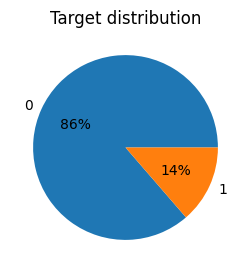

In [377]:
targets = filtered_df['Stroke_Y/N']

temp = targets.value_counts()
temp

plt.figure(figsize=(6, 3))
plt.pie(temp, labels=temp.index, autopct="%.0f%%")
plt.title('Target distribution')
plt.show()

#### Sampling Stroke Patients

- for now we use all available stroke patients

In [ ]:
# adjust the sampling number and save the output in the following format: ()
# Get unique subject IDs
unique_stroke_subjects = labeled_stroke_df['subject_id'].unique()

# Randomly sample 10 unique subject IDs
sampled_stroke_subjects_ids = np.random.choice(unique_stroke_subjects, size=10, replace=False)

# Filter the DataFrame based on the sampled subject IDs
sampled_stroke_subjects = labeled_stroke_df[labeled_stroke_df['subject_id'].isin(sampled_stroke_subjects_ids)]

In [ ]:
sampled_stroke_subjects

### Non-Stroke Patients

In [ ]:
filtered_other_disease_df = diagnosis[
    ~((diagnosis['icd_code'].str.startswith('I')) & diagnosis['numeric_part'].isin(icd10_valid_ranges)) |
    ~((diagnosis['icd_code'].str.startswith('H')) & (diagnosis['numeric_part'] == 34)) |
    ~((diagnosis['icd_code'].str.startswith('G')) & (diagnosis['numeric_part'] == 45)) |
    ~(diagnosis['numeric_part'].isin(icd9_valid_ranges))
]

filtered_other_disease_df = filtered_other_disease_df.drop(columns=['numeric_part'])

In [ ]:
filtered_other_disease_df

#### Labeling Non-Stroke

In [ ]:
labeled_no_stroke_df = filtered_other_disease_df.copy()
labeled_no_stroke_df['Stroke_Y/N'] = 0

In [ ]:
labeled_no_stroke_df

#### Sampling Non-Stroke
- lets try 1000 samples

In [ ]:
sampled_non_stroke_df = labeled_no_stroke_df.sample(n=10000, random_state=42)

In [ ]:
sampled_non_stroke_df

## Combining our sample of Stroke and Non-Stroke Patients
- 100 stroke patients
- 1000 non stroke patients

We have created a dataset where stroke disease is about 10% of the dataset

In [ ]:
combined_df = pd.concat([labeled_stroke_df, sampled_non_stroke_df], ignore_index=True)

In [ ]:
combined_df

## Merging the Stroke and Non-stroke Patients Dataset to the datetimeevents and vital sign dataset

- In MIMIC-IV, datetimeevents records time-stamped clinical interventions (e.g., ventilation start/stop), while chartevents captures high-frequency physiological measurements (e.g., heart rate, blood pressure) for patient monitoring.

In [ ]:
unique_stroke_subjects = combined_df['subject_id'].unique()
print(f"Number of Unique Subject IDs: {len(unique_stroke_subjects)}")

In [ ]:
datetimeevents_filtered = datetimeevents[datetimeevents['subject_id'].isin(unique_stroke_subjects)]
vitalsign_filtered = vitalsign[vitalsign['subject_id'].isin(unique_stroke_subjects)]

In [ ]:
print(f"datetimeevents shape: {datetimeevents_filtered.shape}")
print(f"vitalsign shape: {vitalsign_filtered.shape}")

In [ ]:
combined_df.columns

#### Performing Merge

In [ ]:
merged_vs_df = pd.merge(vitalsign_filtered, combined_df, how='right', on='subject_id')

In [ ]:
merged_vs_df

## Merging with Patient Info dataset

In [ ]:
merged_pi_df = pd.merge(merged_vs_df, patient_info, how='left', on='subject_id')

In [ ]:
merged_pi_df.shape

In [ ]:
merged_pi_df

In [ ]:
merged_pi_df.columns

### Shuffle Dataset Before Saving

In [ ]:
shuffled_df = merged_pi_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
shuffled_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/(0.1_10)_00_sampled_data.csv', index = False)

In [ ]:
shuffled_df

In [ ]:

"""

Time Series Plot for specified subject id

"""
vitalsign_filtered['charttime'] = pd.to_datetime(vitalsign_filtered['charttime'])
subject_id = 17288833
subject_data = vitalsign_filtered[vitalsign_filtered['subject_id'] == subject_id]

subject_data.set_index('charttime', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(subject_data.index, subject_data['temperature'], label='Temperature', marker='o')
plt.plot(subject_data.index, subject_data['heartrate'], label='Heart Rate', marker='x')
plt.plot(subject_data.index, subject_data['resprate'], label='Respiratory Rate', marker='s')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title(f'Time Series for subject_id: {subject_id}')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
subject_id_counts = shuffled_df['subject_id'].value_counts()

average_appearances = subject_id_counts.mean()

print(f"The average number of appearances for each unique subject_id is: {average_appearances:.2f}")


There are 25677 subjects in the diagnosis dataset, for memory efficiency we will look at only 500

In [ ]:
shuffled_df.shape

Looking at null values

In [ ]:
null_values = shuffled_df.isnull().sum()
print(null_values)

Dropping the following columns and the respective reasons:  
1) Temperature: 11267/24280 are null values, and reading of temperature itself is not a strong predictor itself to predict stroke

2) Rhythm: 23438/24280, too little data to make this column useful as a predictor  

3) Pain: data types vary too much, from integer to string inputs, if this column is needed to be used, NLP is needed to analyze text meaning  

4) dod: dead of death does not necessarily attribute to stroke predict just yet, maybe feature engineering of using dod and date of admittance and calculating months survived after diagnosis can help to find severity

# PLEASE IGNORE THE CODE BELOW FOR NOW

In [ ]:
ERROR TO STOP THE BELOW FROM RUNNING

In [ ]:
shuffled_df = shuffled_df.drop(columns = ['temperature','rhythm','pain','dod'])

Interpolate missing values in vital signs


In [ ]:
shuffled_df['heartrate'].interpolate(method='linear', inplace=True)
shuffled_df['resprate'].interpolate(method='linear', inplace=True)
shuffled_df['o2sat'].interpolate(method='linear', inplace=True)
shuffled_df['sbp'].interpolate(method='linear', inplace=True)
shuffled_df['dbp'].interpolate(method='linear', inplace=True)


In [ ]:
null_values = shuffled_df.isnull().sum()
print(null_values)

In [ ]:
df_selected = shuffled_df[['heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'icd_code','icd_version', 'Stroke_Y/N', 'gender', 'anchor_age']]

In [ ]:

le = LabelEncoder()

columns_to_encode = ['icd_code']

for col in columns_to_encode:
    df_selected[col] = le.fit_transform(df_selected[col].astype(str))

In [ ]:
df_selected['gender'] = df_selected['gender'].replace({'M': 0, 'F': 1})

In [ ]:
df_selected.columns

In [ ]:


columns_to_check = ['heartrate', 'resprate', 'o2sat', 'sbp', 'dbp']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 4, i)  # Adjust rows and columns for the subplots
    plt.boxplot(df_selected[col].dropna(), vert=False)  # Drop NaN values and plot horizontally
    plt.title(col)

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


In [ ]:

z_scores = np.abs(stats.zscore(df_selected.select_dtypes(include=[np.number])))

outlier_threshold = 3
outliers = (z_scores > outlier_threshold)

outliers_rows = outliers.any(axis=1)


In [ ]:
df_cleaned = df_selected[~outliers_rows]


In [ ]:
df_cleaned

In [ ]:
df_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/(0.1_10)_00_sampled_data.csv', index = False)